<h1>Getting the Environment Set Up</h1>

We will be using tensorflow to create and use our neural networks. Throughout this notebook, we will see just how easy it is to make a working neural network that has a surprisingly high accuary!

In [1]:
import tensorflow as tf
from tensorflow import keras

<h1>Managing our Images</h1>

In [2]:
# parameters
input_shape = (28, 28) # the image is 28x28
num_classes = 10 # 10 labels
num_epochs = 5 # 5 training iterations, we bump this down because the model takes longer to train

# TODO You can change to the numbers MNIST dataset if you'd like to see how it works on different images
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ("T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot")

# 60,000 images with each image being 28 by 28 pixels
train_images.shape

(60000, 28, 28)

Each image is represented by a 2-D array where each number in the list represents the brightness of the pixel

In [3]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

For our CNN model, we will need this to be a 3-D array for it to work with tensorflow properly. Below we will reshape it to be 3D and then print it out again

In [6]:
train_images = train_images.reshape((60000,28,28,1))
# This just has a massive output, if you want to see the new shape, uncomment it and run this block
# train_images[0]

We will also need to do this for our test images

In [10]:
test_images = test_images.reshape((10000, 28, 28, 1))

That wall of numbers isn't very easy to understand to our brains however. Lets go ahead and display a few of the images from the dataset with matplotlib. If you want to read more about matplot lib, you can go here: https://matplotlib.org/stable/users/index

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def show_imgs():
    plt.figure(figsize=(10,10))
    for i in range(25):
        # Create a 5x5 grid of pictures, place current picture in the grid
        plt.subplot(5,5,i+1)
        # Remove the x and y ticks
        plt.xticks([])
        plt.yticks([])
        # Disable the grid in each picture, we dont want x/y axis for these
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    plt.show()

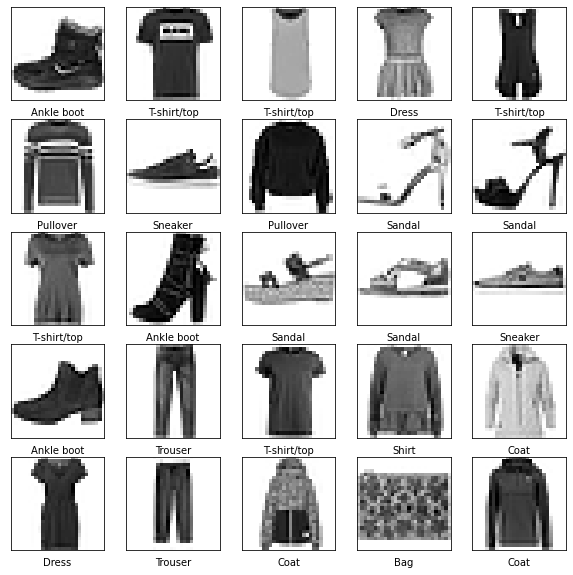

In [13]:
show_imgs()

<h1>Creating Our Model</h1>

Tensorflow lets us create a model super easily. A "Dense" layer is just a layer that is fully connected to the next layer, this is the basic type of layer that we are familiar with. Then all we need to do is specify how many neurons there should be in the given layer and tensorflow figures out the rest.

In [14]:
# The parameters in each of these Conv2D layers are as follows:
# layers.Conv2D(Output_size, Stride, activation, input_shape)
# Stride is just how far the square of relevant pixels moves between layers. 
# Simply put, for this model, the model looks at a 4x4 square of pixels and
# then moves 4 pixels to the left before checking the next 4x4 box of pixels
def create_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Max Pooling just grabs the largest number in a specified area and uses that for the whole area
    # below we are looking at a 2x2 square and using the largest number in that square as the value for the whole square

    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(56, (3, 3), activation='relu'))

    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(56, (3, 3), activation='relu'))
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(10))

    return model

In [15]:
model = create_model()
# The optimizer is just an algorithm that helps the AI learn faster
# The loss is Sparse Categorical Crossentropy, the name is scary but it just means that 
# the outputs are converted to percentages and then compared to the expected output
# Metrics = accuracy means that we only care about how close the answer was to the actual answer 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

2022-06-14 20:28:36.235578: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-14 20:28:36.237399: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-14 20:28:36.237646: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 56)          28280     
_________________________________________________________________
flatten (Flatten)            (None, 504)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

<h1>Training our Model</h1>



Tensorflow makes training easy. All we need to do is give it the input data and the expected outputs with the number of epochs to train for and it will handle the rest!

In [16]:
model.fit(train_images, train_labels, epochs=num_epochs)

2022-06-14 20:29:39.112341: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-14 20:29:39.116895: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2500000000 Hz


Epoch 1/5


   1/1875 [..............................] - ETA: 1:17:08 - loss: 22.0928 - accuracy: 0.1250

   2/1875 [..............................] - ETA: 1:50 - loss: 19.6038 - accuracy: 0.1484   

   4/1875 [..............................] - ETA: 1:32 - loss: 18.0371 - accuracy: 0.1738

   5/1875 [..............................] - ETA: 1:35 - loss: 17.4579 - accuracy: 0.1803

   7/1875 [..............................] - ETA: 1:29 - loss: 16.2605 - accuracy: 0.1912

   9/1875 [..............................] - ETA: 1:31 - loss: 15.2671 - accuracy: 0.1993

  11/1875 [..............................] - ETA: 1:31 - loss: 14.3945 - accuracy: 0.2050

  12/1875 [..............................] - ETA: 1:33 - loss: 13.9966 - accuracy: 0.2068

  14/1875 [..............................] - ETA: 1:32 - loss: 13.2601 - accuracy: 0.2115

  15/1875 [..............................] - ETA: 1:33 - loss: 12.9225 - accuracy: 0.2136

  17/1875 [..............................] - ETA: 1:31 - loss: 12.3004 - accuracy: 0.2193

  18/1875 [..............................] - ETA: 1:32 - loss: 12.0131 - accuracy: 0.2226

  19/1875 [..............................] - ETA: 1:32 - loss: 11.7412 - accuracy: 0.2258

  20/1875 [..............................] - ETA: 1:33 - loss: 11.4836 - accuracy: 0.2291

  21/1875 [..............................] - ETA: 1:34 - loss: 11.2387 - accuracy: 0.2327

  22/1875 [..............................] - ETA: 1:35 - loss: 11.0070 - accuracy: 0.2361

  23/1875 [..............................] - ETA: 1:35 - loss: 10.7864 - accuracy: 0.2394

  25/1875 [..............................] - ETA: 1:34 - loss: 10.3736 - accuracy: 0.2470

  26/1875 [..............................] - ETA: 1:35 - loss: 10.1815 - accuracy: 0.2507

  28/1875 [..............................] - ETA: 1:34 - loss: 9.8229 - accuracy: 0.2581 

  29/1875 [..............................] - ETA: 1:35 - loss: 9.6551 - accuracy: 0.2619

  30/1875 [..............................] - ETA: 1:35 - loss: 9.4945 - accuracy: 0.2656

  31/1875 [..............................] - ETA: 1:35 - loss: 9.3406 - accuracy: 0.2692

  32/1875 [..............................] - ETA: 1:35 - loss: 9.1926 - accuracy: 0.2729

  34/1875 [..............................] - ETA: 1:34 - loss: 8.9136 - accuracy: 0.2804

  36/1875 [..............................] - ETA: 1:33 - loss: 8.6553 - accuracy: 0.2876

  37/1875 [..............................] - ETA: 1:33 - loss: 8.5329 - accuracy: 0.2912

  39/1875 [..............................] - ETA: 1:32 - loss: 8.3012 - accuracy: 0.2982

  41/1875 [..............................] - ETA: 1:31 - loss: 8.0850 - accuracy: 0.3050

  43/1875 [..............................] - ETA: 1:30 - loss: 7.8828 - accuracy: 0.3118

  45/1875 [..............................] - ETA: 1:29 - loss: 7.6941 - accuracy: 0.3182

  47/1875 [..............................] - ETA: 1:29 - loss: 7.5167 - accuracy: 0.3244

  48/1875 [..............................] - ETA: 1:29 - loss: 7.4318 - accuracy: 0.3275

  49/1875 [..............................] - ETA: 1:29 - loss: 7.3492 - accuracy: 0.3305

  51/1875 [..............................] - ETA: 1:29 - loss: 7.1907 - accuracy: 0.3365

  53/1875 [..............................] - ETA: 1:29 - loss: 7.0408 - accuracy: 0.3424

  55/1875 [..............................] - ETA: 1:28 - loss: 6.8987 - accuracy: 0.3482

  56/1875 [..............................] - ETA: 1:28 - loss: 6.8304 - accuracy: 0.3509

  58/1875 [..............................] - ETA: 1:28 - loss: 6.6988 - accuracy: 0.3564

  60/1875 [..............................] - ETA: 1:27 - loss: 6.5735 - accuracy: 0.3618

  61/1875 [..............................] - ETA: 1:28 - loss: 6.5131 - accuracy: 0.3644

  62/1875 [..............................] - ETA: 1:28 - loss: 6.4542 - accuracy: 0.3670

  63/1875 [>.............................] - ETA: 1:28 - loss: 6.3965 - accuracy: 0.3696

  64/1875 [>.............................] - ETA: 1:28 - loss: 6.3402 - accuracy: 0.3721

  66/1875 [>.............................] - ETA: 1:28 - loss: 6.2315 - accuracy: 0.3770

  67/1875 [>.............................] - ETA: 1:29 - loss: 6.1789 - accuracy: 0.3794

  69/1875 [>.............................] - ETA: 1:28 - loss: 6.0773 - accuracy: 0.3840

  71/1875 [>.............................] - ETA: 1:28 - loss: 5.9799 - accuracy: 0.3886

  72/1875 [>.............................] - ETA: 1:28 - loss: 5.9328 - accuracy: 0.3908

  74/1875 [>.............................] - ETA: 1:28 - loss: 5.8416 - accuracy: 0.3950

  75/1875 [>.............................] - ETA: 1:28 - loss: 5.7975 - accuracy: 0.3971

  77/1875 [>.............................] - ETA: 1:28 - loss: 5.7118 - accuracy: 0.4012

  79/1875 [>.............................] - ETA: 1:28 - loss: 5.6294 - accuracy: 0.4051

  80/1875 [>.............................] - ETA: 1:27 - loss: 5.5893 - accuracy: 0.4071

  81/1875 [>.............................] - ETA: 1:28 - loss: 5.5500 - accuracy: 0.4090

  83/1875 [>.............................] - ETA: 1:27 - loss: 5.4734 - accuracy: 0.4128

  85/1875 [>.............................] - ETA: 1:27 - loss: 5.3996 - accuracy: 0.4165

  87/1875 [>.............................] - ETA: 1:26 - loss: 5.3283 - accuracy: 0.4201

  89/1875 [>.............................] - ETA: 1:26 - loss: 5.2595 - accuracy: 0.4236

  91/1875 [>.............................] - ETA: 1:25 - loss: 5.1931 - accuracy: 0.4270

  93/1875 [>.............................] - ETA: 1:24 - loss: 5.1290 - accuracy: 0.4302

  96/1875 [>.............................] - ETA: 1:22 - loss: 5.0367 - accuracy: 0.4349

  99/1875 [>.............................] - ETA: 1:20 - loss: 4.9487 - accuracy: 0.4395

 102/1875 [>.............................] - ETA: 1:19 - loss: 4.8647 - accuracy: 0.4439

 105/1875 [>.............................] - ETA: 1:17 - loss: 4.7843 - accuracy: 0.4482

 108/1875 [>.............................] - ETA: 1:16 - loss: 4.7075 - accuracy: 0.4523

 111/1875 [>.............................] - ETA: 1:15 - loss: 4.6338 - accuracy: 0.4564

 114/1875 [>.............................] - ETA: 1:14 - loss: 4.5633 - accuracy: 0.4603

 117/1875 [>.............................] - ETA: 1:13 - loss: 4.4955 - accuracy: 0.4641

 121/1875 [>.............................] - ETA: 1:11 - loss: 4.4094 - accuracy: 0.4689

 122/1875 [>.............................] - ETA: 1:12 - loss: 4.3885 - accuracy: 0.4701

 123/1875 [>.............................] - ETA: 1:12 - loss: 4.3679 - accuracy: 0.4712

 124/1875 [>.............................] - ETA: 1:12 - loss: 4.3476 - accuracy: 0.4724

 126/1875 [=>............................] - ETA: 1:12 - loss: 4.3077 - accuracy: 0.4746

 128/1875 [=>............................] - ETA: 1:12 - loss: 4.2688 - accuracy: 0.4769

 130/1875 [=>............................] - ETA: 1:11 - loss: 4.2308 - accuracy: 0.4791

 132/1875 [=>............................] - ETA: 1:11 - loss: 4.1938 - accuracy: 0.4812

 134/1875 [=>............................] - ETA: 1:11 - loss: 4.1576 - accuracy: 0.4833

 136/1875 [=>............................] - ETA: 1:11 - loss: 4.1223 - accuracy: 0.4854

 138/1875 [=>............................] - ETA: 1:10 - loss: 4.0879 - accuracy: 0.4874

 140/1875 [=>............................] - ETA: 1:10 - loss: 4.0543 - accuracy: 0.4893

 142/1875 [=>............................] - ETA: 1:10 - loss: 4.0213 - accuracy: 0.4913

 144/1875 [=>............................] - ETA: 1:09 - loss: 3.9891 - accuracy: 0.4932

 147/1875 [=>............................] - ETA: 1:09 - loss: 3.9421 - accuracy: 0.4960

 148/1875 [=>............................] - ETA: 1:09 - loss: 3.9267 - accuracy: 0.4969

 150/1875 [=>............................] - ETA: 1:08 - loss: 3.8965 - accuracy: 0.4988

 152/1875 [=>............................] - ETA: 1:08 - loss: 3.8669 - accuracy: 0.5006

 154/1875 [=>............................] - ETA: 1:08 - loss: 3.8379 - accuracy: 0.5024

 157/1875 [=>............................] - ETA: 1:07 - loss: 3.7956 - accuracy: 0.5050

 158/1875 [=>............................] - ETA: 1:07 - loss: 3.7818 - accuracy: 0.5059

 160/1875 [=>............................] - ETA: 1:07 - loss: 3.7545 - accuracy: 0.5076

 163/1875 [=>............................] - ETA: 1:06 - loss: 3.7146 - accuracy: 0.5101

 166/1875 [=>............................] - ETA: 1:06 - loss: 3.6759 - accuracy: 0.5125

 169/1875 [=>............................] - ETA: 1:05 - loss: 3.6382 - accuracy: 0.5149

 172/1875 [=>............................] - ETA: 1:04 - loss: 3.6016 - accuracy: 0.5172

 175/1875 [=>............................] - ETA: 1:04 - loss: 3.5661 - accuracy: 0.5195

 177/1875 [=>............................] - ETA: 1:03 - loss: 3.5429 - accuracy: 0.5210

 180/1875 [=>............................] - ETA: 1:03 - loss: 3.5089 - accuracy: 0.5232

 183/1875 [=>............................] - ETA: 1:02 - loss: 3.4758 - accuracy: 0.5253

 185/1875 [=>............................] - ETA: 1:02 - loss: 3.4542 - accuracy: 0.5267

 188/1875 [==>...........................] - ETA: 1:01 - loss: 3.4224 - accuracy: 0.5288

 192/1875 [==>...........................] - ETA: 1:00 - loss: 3.3813 - accuracy: 0.5316

 195/1875 [==>...........................] - ETA: 1:00 - loss: 3.3514 - accuracy: 0.5336

 198/1875 [==>...........................] - ETA: 59s - loss: 3.3222 - accuracy: 0.5355 

 201/1875 [==>...........................] - ETA: 59s - loss: 3.2936 - accuracy: 0.5375

 204/1875 [==>...........................] - ETA: 58s - loss: 3.2658 - accuracy: 0.5394

 207/1875 [==>...........................] - ETA: 58s - loss: 3.2387 - accuracy: 0.5412

 210/1875 [==>...........................] - ETA: 57s - loss: 3.2121 - accuracy: 0.5430

 212/1875 [==>...........................] - ETA: 57s - loss: 3.1948 - accuracy: 0.5442

 215/1875 [==>...........................] - ETA: 57s - loss: 3.1692 - accuracy: 0.5460

 218/1875 [==>...........................] - ETA: 56s - loss: 3.1443 - accuracy: 0.5477

 221/1875 [==>...........................] - ETA: 56s - loss: 3.1199 - accuracy: 0.5494

 224/1875 [==>...........................] - ETA: 55s - loss: 3.0960 - accuracy: 0.5511

 227/1875 [==>...........................] - ETA: 55s - loss: 3.0726 - accuracy: 0.5527

 230/1875 [==>...........................] - ETA: 54s - loss: 3.0497 - accuracy: 0.5543

 233/1875 [==>...........................] - ETA: 54s - loss: 3.0273 - accuracy: 0.5559

 236/1875 [==>...........................] - ETA: 54s - loss: 3.0054 - accuracy: 0.5574

 237/1875 [==>...........................] - ETA: 54s - loss: 2.9982 - accuracy: 0.5579

 239/1875 [==>...........................] - ETA: 54s - loss: 2.9840 - accuracy: 0.5589

 240/1875 [==>...........................] - ETA: 54s - loss: 2.9769 - accuracy: 0.5594

 241/1875 [==>...........................] - ETA: 54s - loss: 2.9699 - accuracy: 0.5599

 244/1875 [==>...........................] - ETA: 54s - loss: 2.9492 - accuracy: 0.5614

 247/1875 [==>...........................] - ETA: 53s - loss: 2.9289 - accuracy: 0.5628

 249/1875 [==>...........................] - ETA: 53s - loss: 2.9156 - accuracy: 0.5638

 252/1875 [===>..........................] - ETA: 53s - loss: 2.8959 - accuracy: 0.5652

 255/1875 [===>..........................] - ETA: 52s - loss: 2.8767 - accuracy: 0.5666

 258/1875 [===>..........................] - ETA: 52s - loss: 2.8577 - accuracy: 0.5679

 261/1875 [===>..........................] - ETA: 52s - loss: 2.8392 - accuracy: 0.5693

 264/1875 [===>..........................] - ETA: 51s - loss: 2.8210 - accuracy: 0.5706

 267/1875 [===>..........................] - ETA: 51s - loss: 2.8031 - accuracy: 0.5719

 270/1875 [===>..........................] - ETA: 51s - loss: 2.7856 - accuracy: 0.5732

 274/1875 [===>..........................] - ETA: 50s - loss: 2.7626 - accuracy: 0.5749

 277/1875 [===>..........................] - ETA: 50s - loss: 2.7458 - accuracy: 0.5762

 280/1875 [===>..........................] - ETA: 49s - loss: 2.7292 - accuracy: 0.5774

 283/1875 [===>..........................] - ETA: 49s - loss: 2.7129 - accuracy: 0.5787

 285/1875 [===>..........................] - ETA: 49s - loss: 2.7022 - accuracy: 0.5795

 287/1875 [===>..........................] - ETA: 49s - loss: 2.6916 - accuracy: 0.5803

 289/1875 [===>..........................] - ETA: 49s - loss: 2.6811 - accuracy: 0.5811

 291/1875 [===>..........................] - ETA: 49s - loss: 2.6708 - accuracy: 0.5819

 293/1875 [===>..........................] - ETA: 49s - loss: 2.6605 - accuracy: 0.5826

 295/1875 [===>..........................] - ETA: 49s - loss: 2.6504 - accuracy: 0.5834

 297/1875 [===>..........................] - ETA: 49s - loss: 2.6404 - accuracy: 0.5842

 299/1875 [===>..........................] - ETA: 49s - loss: 2.6305 - accuracy: 0.5850

 301/1875 [===>..........................] - ETA: 49s - loss: 2.6207 - accuracy: 0.5857

 303/1875 [===>..........................] - ETA: 49s - loss: 2.6110 - accuracy: 0.5865

 305/1875 [===>..........................] - ETA: 49s - loss: 2.6014 - accuracy: 0.5872

 307/1875 [===>..........................] - ETA: 49s - loss: 2.5920 - accuracy: 0.5880

 309/1875 [===>..........................] - ETA: 49s - loss: 2.5826 - accuracy: 0.5887

 311/1875 [===>..........................] - ETA: 49s - loss: 2.5733 - accuracy: 0.5895

 313/1875 [====>.........................] - ETA: 49s - loss: 2.5641 - accuracy: 0.5902

 315/1875 [====>.........................] - ETA: 49s - loss: 2.5550 - accuracy: 0.5909

 316/1875 [====>.........................] - ETA: 49s - loss: 2.5505 - accuracy: 0.5913

 318/1875 [====>.........................] - ETA: 49s - loss: 2.5415 - accuracy: 0.5920

 320/1875 [====>.........................] - ETA: 49s - loss: 2.5327 - accuracy: 0.5927

 322/1875 [====>.........................] - ETA: 49s - loss: 2.5239 - accuracy: 0.5933

 323/1875 [====>.........................] - ETA: 49s - loss: 2.5196 - accuracy: 0.5937

 325/1875 [====>.........................] - ETA: 49s - loss: 2.5109 - accuracy: 0.5944

 327/1875 [====>.........................] - ETA: 48s - loss: 2.5024 - accuracy: 0.5950

 329/1875 [====>.........................] - ETA: 48s - loss: 2.4940 - accuracy: 0.5957

 331/1875 [====>.........................] - ETA: 48s - loss: 2.4856 - accuracy: 0.5964

 332/1875 [====>.........................] - ETA: 48s - loss: 2.4815 - accuracy: 0.5967

 334/1875 [====>.........................] - ETA: 48s - loss: 2.4733 - accuracy: 0.5974

 336/1875 [====>.........................] - ETA: 48s - loss: 2.4651 - accuracy: 0.5980

 338/1875 [====>.........................] - ETA: 48s - loss: 2.4570 - accuracy: 0.5986

 340/1875 [====>.........................] - ETA: 48s - loss: 2.4491 - accuracy: 0.5993

 342/1875 [====>.........................] - ETA: 48s - loss: 2.4411 - accuracy: 0.5999

 344/1875 [====>.........................] - ETA: 48s - loss: 2.4333 - accuracy: 0.6005

 346/1875 [====>.........................] - ETA: 48s - loss: 2.4255 - accuracy: 0.6012

 348/1875 [====>.........................] - ETA: 48s - loss: 2.4178 - accuracy: 0.6018

 349/1875 [====>.........................] - ETA: 48s - loss: 2.4140 - accuracy: 0.6021

 351/1875 [====>.........................] - ETA: 48s - loss: 2.4064 - accuracy: 0.6027

 353/1875 [====>.........................] - ETA: 48s - loss: 2.3989 - accuracy: 0.6033

 355/1875 [====>.........................] - ETA: 48s - loss: 2.3914 - accuracy: 0.6039

 357/1875 [====>.........................] - ETA: 48s - loss: 2.3840 - accuracy: 0.6045

 358/1875 [====>.........................] - ETA: 48s - loss: 2.3804 - accuracy: 0.6048

 360/1875 [====>.........................] - ETA: 48s - loss: 2.3731 - accuracy: 0.6054

 361/1875 [====>.........................] - ETA: 48s - loss: 2.3695 - accuracy: 0.6057

 363/1875 [====>.........................] - ETA: 48s - loss: 2.3623 - accuracy: 0.6063

 366/1875 [====>.........................] - ETA: 48s - loss: 2.3516 - accuracy: 0.6072

 369/1875 [====>.........................] - ETA: 48s - loss: 2.3411 - accuracy: 0.6080

 372/1875 [====>.........................] - ETA: 47s - loss: 2.3307 - accuracy: 0.6089

 375/1875 [=====>........................] - ETA: 47s - loss: 2.3205 - accuracy: 0.6097

 378/1875 [=====>........................] - ETA: 47s - loss: 2.3103 - accuracy: 0.6106

 381/1875 [=====>........................] - ETA: 47s - loss: 2.3003 - accuracy: 0.6114

 383/1875 [=====>........................] - ETA: 47s - loss: 2.2937 - accuracy: 0.6120

 386/1875 [=====>........................] - ETA: 46s - loss: 2.2839 - accuracy: 0.6128

 389/1875 [=====>........................] - ETA: 46s - loss: 2.2743 - accuracy: 0.6136

 392/1875 [=====>........................] - ETA: 46s - loss: 2.2647 - accuracy: 0.6144

 395/1875 [=====>........................] - ETA: 46s - loss: 2.2553 - accuracy: 0.6152

 398/1875 [=====>........................] - ETA: 45s - loss: 2.2460 - accuracy: 0.6159

 401/1875 [=====>........................] - ETA: 45s - loss: 2.2369 - accuracy: 0.6167

 403/1875 [=====>........................] - ETA: 45s - loss: 2.2308 - accuracy: 0.6172

 405/1875 [=====>........................] - ETA: 45s - loss: 2.2248 - accuracy: 0.6177

 407/1875 [=====>........................] - ETA: 45s - loss: 2.2188 - accuracy: 0.6182

 409/1875 [=====>........................] - ETA: 45s - loss: 2.2129 - accuracy: 0.6187

 411/1875 [=====>........................] - ETA: 45s - loss: 2.2071 - accuracy: 0.6192

 413/1875 [=====>........................] - ETA: 45s - loss: 2.2013 - accuracy: 0.6197

 415/1875 [=====>........................] - ETA: 45s - loss: 2.1955 - accuracy: 0.6202

 416/1875 [=====>........................] - ETA: 45s - loss: 2.1926 - accuracy: 0.6205

 417/1875 [=====>........................] - ETA: 45s - loss: 2.1898 - accuracy: 0.6207

 419/1875 [=====>........................] - ETA: 45s - loss: 2.1841 - accuracy: 0.6212

 421/1875 [=====>........................] - ETA: 45s - loss: 2.1784 - accuracy: 0.6217

 423/1875 [=====>........................] - ETA: 45s - loss: 2.1728 - accuracy: 0.6222

 426/1875 [=====>........................] - ETA: 45s - loss: 2.1645 - accuracy: 0.6229

 429/1875 [=====>........................] - ETA: 44s - loss: 2.1563 - accuracy: 0.6236

 432/1875 [=====>........................] - ETA: 44s - loss: 2.1481 - accuracy: 0.6243

 434/1875 [=====>........................] - ETA: 44s - loss: 2.1428 - accuracy: 0.6248

 437/1875 [=====>........................] - ETA: 44s - loss: 2.1348 - accuracy: 0.6255

 440/1875 [======>.......................] - ETA: 44s - loss: 2.1269 - accuracy: 0.6262

 443/1875 [======>.......................] - ETA: 44s - loss: 2.1191 - accuracy: 0.6269

 446/1875 [======>.......................] - ETA: 43s - loss: 2.1113 - accuracy: 0.6275

 449/1875 [======>.......................] - ETA: 43s - loss: 2.1037 - accuracy: 0.6282

 452/1875 [======>.......................] - ETA: 43s - loss: 2.0961 - accuracy: 0.6289

 455/1875 [======>.......................] - ETA: 43s - loss: 2.0887 - accuracy: 0.6295

 458/1875 [======>.......................] - ETA: 43s - loss: 2.0813 - accuracy: 0.6302

 461/1875 [======>.......................] - ETA: 42s - loss: 2.0739 - accuracy: 0.6309

 463/1875 [======>.......................] - ETA: 42s - loss: 2.0691 - accuracy: 0.6313

 465/1875 [======>.......................] - ETA: 42s - loss: 2.0643 - accuracy: 0.6317

 467/1875 [======>.......................] - ETA: 42s - loss: 2.0595 - accuracy: 0.6322

 469/1875 [======>.......................] - ETA: 42s - loss: 2.0548 - accuracy: 0.6326

 470/1875 [======>.......................] - ETA: 42s - loss: 2.0524 - accuracy: 0.6328

 471/1875 [======>.......................] - ETA: 42s - loss: 2.0501 - accuracy: 0.6330

 472/1875 [======>.......................] - ETA: 42s - loss: 2.0478 - accuracy: 0.6332

 473/1875 [======>.......................] - ETA: 42s - loss: 2.0454 - accuracy: 0.6335

 474/1875 [======>.......................] - ETA: 43s - loss: 2.0431 - accuracy: 0.6337

 476/1875 [======>.......................] - ETA: 42s - loss: 2.0385 - accuracy: 0.6341

 478/1875 [======>.......................] - ETA: 42s - loss: 2.0339 - accuracy: 0.6345

 481/1875 [======>.......................] - ETA: 42s - loss: 2.0271 - accuracy: 0.6351

 484/1875 [======>.......................] - ETA: 42s - loss: 2.0203 - accuracy: 0.6357

 487/1875 [======>.......................] - ETA: 42s - loss: 2.0137 - accuracy: 0.6363

 490/1875 [======>.......................] - ETA: 42s - loss: 2.0071 - accuracy: 0.6369

 493/1875 [======>.......................] - ETA: 41s - loss: 2.0005 - accuracy: 0.6375

 495/1875 [======>.......................] - ETA: 41s - loss: 1.9962 - accuracy: 0.6379

 497/1875 [======>.......................] - ETA: 41s - loss: 1.9919 - accuracy: 0.6383

 500/1875 [=======>......................] - ETA: 41s - loss: 1.9855 - accuracy: 0.6389

 503/1875 [=======>......................] - ETA: 41s - loss: 1.9792 - accuracy: 0.6395

 506/1875 [=======>......................] - ETA: 41s - loss: 1.9729 - accuracy: 0.6401

 509/1875 [=======>......................] - ETA: 41s - loss: 1.9667 - accuracy: 0.6407

 511/1875 [=======>......................] - ETA: 41s - loss: 1.9626 - accuracy: 0.6411

 513/1875 [=======>......................] - ETA: 41s - loss: 1.9585 - accuracy: 0.6414

 516/1875 [=======>......................] - ETA: 40s - loss: 1.9524 - accuracy: 0.6420

 519/1875 [=======>......................] - ETA: 40s - loss: 1.9464 - accuracy: 0.6426

 522/1875 [=======>......................] - ETA: 40s - loss: 1.9405 - accuracy: 0.6431

 525/1875 [=======>......................] - ETA: 40s - loss: 1.9346 - accuracy: 0.6437

 527/1875 [=======>......................] - ETA: 40s - loss: 1.9307 - accuracy: 0.6441

 530/1875 [=======>......................] - ETA: 40s - loss: 1.9249 - accuracy: 0.6446

 533/1875 [=======>......................] - ETA: 40s - loss: 1.9191 - accuracy: 0.6451

 536/1875 [=======>......................] - ETA: 39s - loss: 1.9134 - accuracy: 0.6457

 539/1875 [=======>......................] - ETA: 39s - loss: 1.9078 - accuracy: 0.6462

 542/1875 [=======>......................] - ETA: 39s - loss: 1.9022 - accuracy: 0.6467

 545/1875 [=======>......................] - ETA: 39s - loss: 1.8967 - accuracy: 0.6473

 548/1875 [=======>......................] - ETA: 39s - loss: 1.8912 - accuracy: 0.6478

 551/1875 [=======>......................] - ETA: 39s - loss: 1.8857 - accuracy: 0.6483

 554/1875 [=======>......................] - ETA: 38s - loss: 1.8804 - accuracy: 0.6488

 557/1875 [=======>......................] - ETA: 38s - loss: 1.8750 - accuracy: 0.6493

 560/1875 [=======>......................] - ETA: 38s - loss: 1.8697 - accuracy: 0.6498

 563/1875 [========>.....................] - ETA: 38s - loss: 1.8645 - accuracy: 0.6503

 566/1875 [========>.....................] - ETA: 38s - loss: 1.8593 - accuracy: 0.6508

 569/1875 [========>.....................] - ETA: 38s - loss: 1.8541 - accuracy: 0.6513

 572/1875 [========>.....................] - ETA: 37s - loss: 1.8490 - accuracy: 0.6518

 575/1875 [========>.....................] - ETA: 37s - loss: 1.8439 - accuracy: 0.6523

 578/1875 [========>.....................] - ETA: 37s - loss: 1.8389 - accuracy: 0.6528

 581/1875 [========>.....................] - ETA: 37s - loss: 1.8339 - accuracy: 0.6533

 584/1875 [========>.....................] - ETA: 37s - loss: 1.8290 - accuracy: 0.6537

 587/1875 [========>.....................] - ETA: 37s - loss: 1.8241 - accuracy: 0.6542

 590/1875 [========>.....................] - ETA: 37s - loss: 1.8192 - accuracy: 0.6547

 592/1875 [========>.....................] - ETA: 37s - loss: 1.8160 - accuracy: 0.6550

 595/1875 [========>.....................] - ETA: 36s - loss: 1.8112 - accuracy: 0.6555

 598/1875 [========>.....................] - ETA: 36s - loss: 1.8064 - accuracy: 0.6560

 600/1875 [========>.....................] - ETA: 36s - loss: 1.8033 - accuracy: 0.6563

 603/1875 [========>.....................] - ETA: 36s - loss: 1.7986 - accuracy: 0.6567

 606/1875 [========>.....................] - ETA: 36s - loss: 1.7939 - accuracy: 0.6572

 608/1875 [========>.....................] - ETA: 36s - loss: 1.7909 - accuracy: 0.6575

 610/1875 [========>.....................] - ETA: 36s - loss: 1.7878 - accuracy: 0.6578

 612/1875 [========>.....................] - ETA: 36s - loss: 1.7847 - accuracy: 0.6581

 614/1875 [========>.....................] - ETA: 36s - loss: 1.7817 - accuracy: 0.6584

 616/1875 [========>.....................] - ETA: 36s - loss: 1.7787 - accuracy: 0.6587

 618/1875 [========>.....................] - ETA: 36s - loss: 1.7757 - accuracy: 0.6590

 620/1875 [========>.....................] - ETA: 36s - loss: 1.7727 - accuracy: 0.6593

 622/1875 [========>.....................] - ETA: 36s - loss: 1.7697 - accuracy: 0.6596

 623/1875 [========>.....................] - ETA: 36s - loss: 1.7682 - accuracy: 0.6598

 626/1875 [=========>....................] - ETA: 36s - loss: 1.7638 - accuracy: 0.6602

 628/1875 [=========>....................] - ETA: 36s - loss: 1.7609 - accuracy: 0.6605

 630/1875 [=========>....................] - ETA: 35s - loss: 1.7579 - accuracy: 0.6608

 632/1875 [=========>....................] - ETA: 35s - loss: 1.7550 - accuracy: 0.6611

 634/1875 [=========>....................] - ETA: 35s - loss: 1.7522 - accuracy: 0.6614

 636/1875 [=========>....................] - ETA: 35s - loss: 1.7493 - accuracy: 0.6617

 638/1875 [=========>....................] - ETA: 35s - loss: 1.7464 - accuracy: 0.6620

 640/1875 [=========>....................] - ETA: 35s - loss: 1.7436 - accuracy: 0.6622

 642/1875 [=========>....................] - ETA: 35s - loss: 1.7407 - accuracy: 0.6625

 643/1875 [=========>....................] - ETA: 35s - loss: 1.7393 - accuracy: 0.6627

 645/1875 [=========>....................] - ETA: 35s - loss: 1.7365 - accuracy: 0.6630

 647/1875 [=========>....................] - ETA: 35s - loss: 1.7337 - accuracy: 0.6633

 649/1875 [=========>....................] - ETA: 35s - loss: 1.7309 - accuracy: 0.6635

 652/1875 [=========>....................] - ETA: 35s - loss: 1.7268 - accuracy: 0.6640

 654/1875 [=========>....................] - ETA: 35s - loss: 1.7241 - accuracy: 0.6642

 657/1875 [=========>....................] - ETA: 35s - loss: 1.7200 - accuracy: 0.6647

 660/1875 [=========>....................] - ETA: 35s - loss: 1.7159 - accuracy: 0.6651

 662/1875 [=========>....................] - ETA: 35s - loss: 1.7132 - accuracy: 0.6653

 664/1875 [=========>....................] - ETA: 35s - loss: 1.7105 - accuracy: 0.6656

 666/1875 [=========>....................] - ETA: 35s - loss: 1.7079 - accuracy: 0.6659

 668/1875 [=========>....................] - ETA: 34s - loss: 1.7052 - accuracy: 0.6662

 670/1875 [=========>....................] - ETA: 34s - loss: 1.7026 - accuracy: 0.6664

 673/1875 [=========>....................] - ETA: 34s - loss: 1.6987 - accuracy: 0.6668

 675/1875 [=========>....................] - ETA: 34s - loss: 1.6961 - accuracy: 0.6671

 678/1875 [=========>....................] - ETA: 34s - loss: 1.6922 - accuracy: 0.6675

 681/1875 [=========>....................] - ETA: 34s - loss: 1.6883 - accuracy: 0.6679

 684/1875 [=========>....................] - ETA: 34s - loss: 1.6845 - accuracy: 0.6683

 687/1875 [=========>....................] - ETA: 34s - loss: 1.6807 - accuracy: 0.6687

 689/1875 [==========>...................] - ETA: 34s - loss: 1.6782 - accuracy: 0.6689

 692/1875 [==========>...................] - ETA: 34s - loss: 1.6745 - accuracy: 0.6693

 695/1875 [==========>...................] - ETA: 33s - loss: 1.6707 - accuracy: 0.6697

 698/1875 [==========>...................] - ETA: 33s - loss: 1.6671 - accuracy: 0.6701

 700/1875 [==========>...................] - ETA: 33s - loss: 1.6646 - accuracy: 0.6703

 702/1875 [==========>...................] - ETA: 33s - loss: 1.6622 - accuracy: 0.6706

 705/1875 [==========>...................] - ETA: 33s - loss: 1.6585 - accuracy: 0.6710

 707/1875 [==========>...................] - ETA: 33s - loss: 1.6561 - accuracy: 0.6712

<h1>Evaluating our Model</h1>

Evaluating out model with tensorflow is super easy. We can see blow that we were able to get about a 90% accuracy on images that our model has never seen before!

In [17]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f'Accuracy = {test_accuracy} on {test_images.shape[0]} images')

  1/313 [..............................] - ETA: 1:33 - loss: 0.7823 - accuracy: 0.8438

  5/313 [..............................] - ETA: 4s - loss: 0.4774 - accuracy: 0.8500  

  9/313 [..............................] - ETA: 4s - loss: 0.3510 - accuracy: 0.8819

 13/313 [>.............................] - ETA: 4s - loss: 0.3300 - accuracy: 0.8798

 18/313 [>.............................] - ETA: 3s - loss: 0.3136 - accuracy: 0.8889

 22/313 [=>............................] - ETA: 3s - loss: 0.3285 - accuracy: 0.8892

 26/313 [=>............................] - ETA: 3s - loss: 0.3471 - accuracy: 0.8930

 32/313 [==>...........................] - ETA: 3s - loss: 0.3441 - accuracy: 0.8887

 34/313 [==>...........................] - ETA: 4s - loss: 0.3401 - accuracy: 0.8915

 36/313 [==>...........................] - ETA: 4s - loss: 0.3408 - accuracy: 0.8906

 40/313 [==>...........................] - ETA: 4s - loss: 0.3461 - accuracy: 0.8883

 46/313 [===>..........................] - ETA: 4s - loss: 0.3499 - accuracy: 0.8865

 51/313 [===>..........................] - ETA: 3s - loss: 0.3376 - accuracy: 0.8879

 56/313 [====>.........................] - ETA: 3s - loss: 0.3322 - accuracy: 0.8867

 62/313 [====>.........................] - ETA: 3s - loss: 0.3303 - accuracy: 0.8861

 66/313 [=====>........................] - ETA: 3s - loss: 0.3300 - accuracy: 0.8864

 70/313 [=====>........................] - ETA: 3s - loss: 0.3206 - accuracy: 0.8897

 76/313 [======>.......................] - ETA: 3s - loss: 0.3198 - accuracy: 0.8890

 82/313 [======>.......................] - ETA: 3s - loss: 0.3167 - accuracy: 0.8902

 88/313 [=======>......................] - ETA: 2s - loss: 0.3138 - accuracy: 0.8903

 94/313 [========>.....................] - ETA: 2s - loss: 0.3294 - accuracy: 0.8850

 99/313 [========>.....................] - ETA: 2s - loss: 0.3303 - accuracy: 0.8848

105/313 [=========>....................] - ETA: 2s - loss: 0.3367 - accuracy: 0.8830

110/313 [=========>....................] - ETA: 2s - loss: 0.3367 - accuracy: 0.8830

115/313 [==========>...................] - ETA: 2s - loss: 0.3387 - accuracy: 0.8826

120/313 [==========>...................] - ETA: 2s - loss: 0.3380 - accuracy: 0.8826

125/313 [==========>...................] - ETA: 2s - loss: 0.3397 - accuracy: 0.8823

130/313 [===========>..................] - ETA: 2s - loss: 0.3459 - accuracy: 0.8817

135/313 [===========>..................] - ETA: 2s - loss: 0.3445 - accuracy: 0.8822

140/313 [============>.................] - ETA: 2s - loss: 0.3392 - accuracy: 0.8828

145/313 [============>.................] - ETA: 2s - loss: 0.3338 - accuracy: 0.8843

149/313 [=============>................] - ETA: 1s - loss: 0.3356 - accuracy: 0.8836

154/313 [=============>................] - ETA: 1s - loss: 0.3375 - accuracy: 0.8831

160/313 [==============>...............] - ETA: 1s - loss: 0.3385 - accuracy: 0.8828

164/313 [==============>...............] - ETA: 1s - loss: 0.3372 - accuracy: 0.8828

168/313 [===============>..............] - ETA: 1s - loss: 0.3381 - accuracy: 0.8826

177/313 [===============>..............] - ETA: 1s - loss: 0.3434 - accuracy: 0.8801

183/313 [================>.............] - ETA: 1s - loss: 0.3420 - accuracy: 0.8808

191/313 [=================>............] - ETA: 1s - loss: 0.3420 - accuracy: 0.8804

199/313 [==================>...........] - ETA: 1s - loss: 0.3400 - accuracy: 0.8810

207/313 [==================>...........] - ETA: 1s - loss: 0.3366 - accuracy: 0.8815

213/313 [===================>..........] - ETA: 1s - loss: 0.3343 - accuracy: 0.8820

221/313 [====================>.........] - ETA: 0s - loss: 0.3336 - accuracy: 0.8818

228/313 [====================>.........] - ETA: 0s - loss: 0.3334 - accuracy: 0.8816

237/313 [=====================>........] - ETA: 0s - loss: 0.3292 - accuracy: 0.8830

243/313 [======================>.......] - ETA: 0s - loss: 0.3272 - accuracy: 0.8835

248/313 [======================>.......] - ETA: 0s - loss: 0.3265 - accuracy: 0.8836

251/313 [=======================>......] - ETA: 0s - loss: 0.3271 - accuracy: 0.8836

254/313 [=======================>......] - ETA: 0s - loss: 0.3269 - accuracy: 0.8835

257/313 [=======================>......] - ETA: 0s - loss: 0.3258 - accuracy: 0.8838

262/313 [========================>.....] - ETA: 0s - loss: 0.3257 - accuracy: 0.8841

268/313 [========================>.....] - ETA: 0s - loss: 0.3266 - accuracy: 0.8842

272/313 [=========================>....] - ETA: 0s - loss: 0.3275 - accuracy: 0.8841

279/313 [=========================>....] - ETA: 0s - loss: 0.3280 - accuracy: 0.8842

286/313 [==========================>...] - ETA: 0s - loss: 0.3265 - accuracy: 0.8845

292/313 [==========================>...] - ETA: 0s - loss: 0.3267 - accuracy: 0.8842

302/313 [===========================>..] - ETA: 0s - loss: 0.3239 - accuracy: 0.8849

311/313 [============================>.] - ETA: 0s - loss: 0.3218 - accuracy: 0.8858

313/313 [==============================] - 4s 10ms/step - loss: 0.3218 - accuracy: 0.8856


Accuracy = 0.8855999708175659 on 10000 images


But those numbers don't really show the whole story. For example, we do not know which images it is struggling on specifically. To show off our model and give us a chance to see where it is struggling, we will show an image and make a prediction on it. First, we're going to make predictions on the entire test dataset to show off later

In [18]:
predictions = model.predict(test_images)

In [21]:
# pred = model.predict(np.array(test_images[0]))
test_images[0].shape
np.array(test_images[0]).shape

(28, 28, 1)

Now, we'll generate a random number and use it to show off the corresponding image, prediction and actual label. This allows us to re-run this block over and over to see a range of predictions



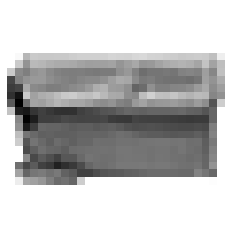

Our model predicted: Bag
The actual answer was: Bag


In [22]:
import random
rand = random.randint(0,9999)

plt.subplot()
plt.axis('off')
plt.imshow(test_images[rand], cmap=plt.cm.binary)
plt.show()

prediction = np.argmax(predictions[rand])
actual = class_names[test_labels[rand]]
print(f'Our model predicted: {class_names[prediction]}')
print(f'The actual answer was: {actual}')